In [27]:
import pandas as pd
import numpy as np

In [28]:
## Training dataset read into dataframe: df ##
df=pd.read_csv(r"train_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 26 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null int64
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 non-null float64
d-dimer                   9600 non-null float64
Heart rate                9600 n

In [29]:
df=df.replace('?',np.nan)

In [30]:
## replacing NaNs nominal values with most probablistic values ##

df['Region'].replace(np.nan,'Chennai',inplace=True)
df['Gender'].replace(np.nan,'Female',inplace=True)
df['Married'].replace(np.nan,'YES',inplace=True)
df['Occupation'].replace(np.nan,'Sales',inplace=True)
df['Mode_transport'].replace(np.nan,'Public',inplace=True)
df['comorbidity'].replace(np.nan,'Hypertension',inplace=True)
df['cardiological pressure'].replace(np.nan,'Normal',inplace=True)

In [31]:
## replacing NaNs numerical values with avg/mean ##

df['Children'].replace(np.nan,1.0,inplace=True)
df['cases/1M'].replace(np.nan,3.28,inplace=True)
df['Deaths/1M'].replace(np.nan,0.52,inplace=True)
df['Age'].replace(np.nan,42.0,inplace=True)
df['Coma score'].replace(np.nan,9.01,inplace=True)
df['Diuresis'].replace(np.nan,278.8,inplace=True)
df['Platelets'].replace(np.nan,87.79,inplace=True)
df['HBB'].replace(np.nan,116.17,inplace=True)
df['d-dimer'].replace(np.nan,275.29,inplace=True)
df['Heart rate'].replace(np.nan,74.84,inplace=True)
df['HDL cholesterol'].replace(np.nan,52.63,inplace=True)
df['Charlson Index'].replace(np.nan,20.0,inplace=True)
df['Blood Glucose'].replace(np.nan,5.0,inplace=True)
df['Insurance'].replace(np.nan,2644918.95,inplace=True)
df['salary'].replace(np.nan,1304713.46,inplace=True)
df['FT/month'].replace(np.nan,1.0,inplace=True)
df['Infect_Prob'].replace(np.nan,52.3,inplace=True)

In [32]:
df['Children']= df['Children'].replace('\t?',0, regex=True)
df['cases/1M']= df['cases/1M'].replace('\t?',0, regex=True)
df['people_ID']=df['people_ID'].replace('\t?',0, regex=True)
#---
df['Children']=df['Children'].astype('float64')
df['cases/1M']=df['cases/1M'].astype('float64')
df['people_ID']=df['people_ID'].astype('int64')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 26 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Married                   10714 non-null object
Children                  10714 non-null float64
Occupation                10714 non-null object
Mode_transport            10714 non-null object
cases/1M                  10714 non-null float64
Deaths/1M                 10714 non-null int64
comorbidity               10714 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null int64
cardiological pressure    10714 non-null object
Diuresis                  10714 non-null float64
Platelets                 10714 non-null float64
HBB                       10714 non-null float64
d-dimer                   10714 non-null float64
Heart rate                

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

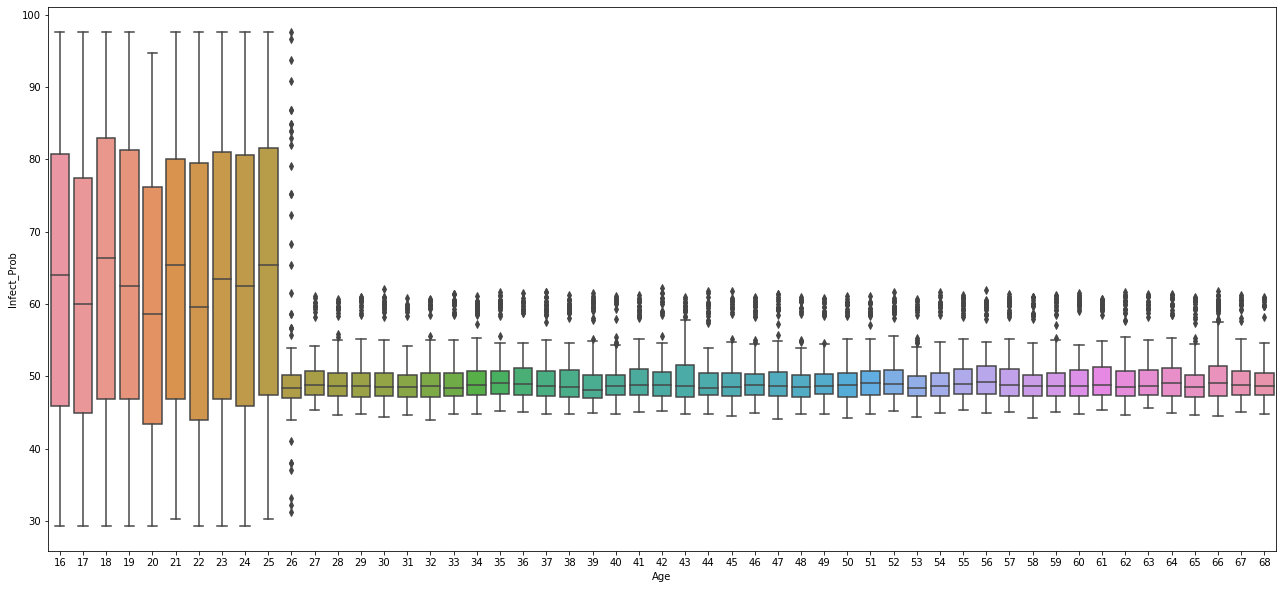

In [35]:
plt.figure(figsize=(22,10))
sns.boxplot(x='Age',y='Infect_Prob',data=df)
plt.show()

In [36]:
## According to the given data, older age groups in general have a higher probability of infection
## The data for the younger age groups seems highly skewed wrt older age groups
## The probability has the highest variancee in younger age groups, wherein there is both a low and high chance of infection
## This is mainly due to existence of several outliers in the data 
## Unlike, the older age groups wherein there seems to be a consistently higher chance of infection observed.


#plt.figure(figsize=(22,10))
#y_pos = np.arange(len(data['Age']))
#plt.ylabel('Infect_Prob')
#plt.xlabel('Age')
#plt.bar(data['Age'],data['Infect_Prob'],align='center',alpha=0.5)
#plt.show()

In [37]:
#training
#from sklearn.model_selection import train_test_split
#xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [38]:
y=df['Infect_Prob']
y=pd.DataFrame(y)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 1 columns):
Infect_Prob    10714 non-null float64
dtypes: float64(1)
memory usage: 83.8 KB


In [39]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()   
df['Gender']= le.fit_transform(df['Gender']) 
df['Region']= le.fit_transform(df['Region'])
df['Married']= le.fit_transform(df['Married']) 
df['Occupation']= le.fit_transform(df['Occupation']) 
df['comorbidity']= le.fit_transform(df['comorbidity']) 
df['Mode_transport']= le.fit_transform(df['Mode_transport'])
df['cardiological pressure']= le.fit_transform(df['cardiological pressure']) 
df['Pulmonary score']= le.fit_transform(df['Pulmonary score'])
df

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,1,0,1,1.0,4,1,2.0,0,2,...,93.0,233.00,82.00,58.0,27,7,3600000.00,1300000,2.0,49.135010
1,2,1,0,1,2.0,4,2,2.0,0,1,...,56.0,328.00,89.00,68.0,5,6,1600000.00,400000,1.0,51.147880
2,3,1,0,0,1.0,1,1,2.0,0,3,...,137.0,213.00,77.00,43.0,40,6,3400000.00,900000,1.0,73.224000
3,4,1,0,1,1.0,3,0,2.0,0,0,...,167.0,275.00,64.00,60.0,27,7,700000.00,2300000,1.0,48.779225
4,5,1,0,0,2.0,6,0,2.0,0,1,...,153.0,331.00,71.00,64.0,32,7,3200000.00,1100000,1.0,87.868800
5,6,1,0,1,1.0,2,1,2.0,0,3,...,86.0,216.00,94.00,38.0,5,5,4600000.00,1900000,2.0,49.518345
6,7,1,0,1,2.0,6,0,2.0,0,0,...,156.0,311.00,99.00,68.0,23,5,4000000.00,1600000,1.0,49.670361
7,8,1,0,1,1.0,6,1,2.0,0,1,...,179.0,242.00,82.00,59.0,34,3,4100000.00,1200000,0.0,49.121025
8,9,1,0,1,2.0,8,1,2.0,0,2,...,156.0,275.29,74.84,37.0,21,7,4500000.00,900000,0.0,48.531922
9,10,1,0,1,1.0,4,1,2.0,0,3,...,178.0,277.00,83.00,58.0,28,4,2200000.00,1400000,2.0,48.475097


In [40]:
x = df.drop('Infect_Prob',axis=1)

In [41]:
from sklearn.preprocessing import OneHotEncoder 

onehotencoder = OneHotEncoder() 
df = onehotencoder.fit_transform(df).toarray()
df

/Users/aishwaryapradeep/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
from sklearn.neural_network import MLPRegressor

#mlp = MLPRegressor(hidden_layer_sizes=(30,30,30,30,30), verbose = True)
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30,30,30))
mlp.fit(x, y)

/Users/aishwaryapradeep/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 30, 30, 30, 30), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [43]:
testdf = pd.read_csv(r"test_data.csv")

In [44]:
#testdf.info()

In [45]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le0 = LabelEncoder() 
  
testdf['Gender']= le0.fit_transform(testdf['Gender']) 
testdf['Region']= le0.fit_transform(testdf['Region'])
testdf['Married']= le0.fit_transform(testdf['Married']) 
testdf['Occupation']= le0.fit_transform(testdf['Occupation']) 
testdf['comorbidity']= le0.fit_transform(testdf['comorbidity']) 
testdf['Mode_transport']= le0.fit_transform(testdf['Mode_transport'])
testdf['cardiological pressure']= le0.fit_transform(testdf['cardiological pressure']) 
testdf['Pulmonary score']= le0.fit_transform(testdf['Pulmonary score'])
testdf

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,0,0,1,2,3,1,4,1,1,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,0,1,1,2,5,2,4,1,1,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,0,0,1,2,8,0,4,1,1,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,0,0,1,2,8,0,4,1,3,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,0,0,1,2,0,0,4,1,1,...,109,207,312,94,68,39,5,2300000,1500000,1
5,18749,0,1,1,2,8,2,4,1,1,...,35,185,291,75,61,26,6,3400000,1700000,1
6,5228,0,0,1,2,3,0,4,1,3,...,82,152,246,75,42,5,3,3500000,1000000,2
7,5559,0,0,1,2,6,2,4,1,3,...,117,112,343,68,54,24,3,3500000,400000,1
8,5220,0,0,1,2,7,1,4,1,2,...,89,107,224,80,53,5,6,1800000,1600000,2
9,5476,0,0,1,2,7,1,4,1,2,...,57,146,303,81,48,31,7,500000,800000,1


In [46]:
testdf['Children'] = testdf['Children'].astype('float64')
testdf['cases/1M'] = testdf['cases/1M'].astype('float64')
testdf['Deaths/1M'] = testdf['Deaths/1M'].astype('float64')
testdf['Age'] = testdf['Age'].astype('float64')
testdf['Coma score'] = testdf['Coma score'].astype('float64')
testdf['Diuresis'] = testdf['Diuresis'].astype('float64')
testdf['Platelets'] = testdf['Platelets'].astype('float64')
testdf['HBB'] = testdf['HBB'].astype('float64')
testdf['d-dimer'] = testdf['d-dimer'].astype('float64')
testdf['Heart rate'] = testdf['Heart rate'].astype('float64')
testdf['HDL cholesterol'] = testdf['HDL cholesterol'].astype('float64')
testdf['Charlson Index'] = testdf['Charlson Index'].astype('float64')
testdf['Blood Glucose'] = testdf['Blood Glucose'].astype('float64')
testdf['Insurance'] = testdf['Insurance'].astype('float64')
testdf['salary'] = testdf['salary'].astype('float64')
testdf['FT/month'] = testdf['FT/month'].astype('float64')


In [47]:
testdf.info()
#testdf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 25 columns):
people_ID                 14498 non-null int64
Region                    14498 non-null int64
Gender                    14498 non-null int64
Married                   14498 non-null int64
Children                  14498 non-null float64
Occupation                14498 non-null int64
Mode_transport            14498 non-null int64
cases/1M                  14498 non-null float64
Deaths/1M                 14498 non-null float64
comorbidity               14498 non-null int64
Age                       14498 non-null float64
Coma score                14498 non-null float64
Pulmonary score           14498 non-null int64
cardiological pressure    14498 non-null int64
Diuresis                  14498 non-null float64
Platelets                 14498 non-null float64
HBB                       14498 non-null float64
d-dimer                   14498 non-null float64
Heart rate                1

In [48]:
finaltest = mlp.predict(testdf)

In [49]:
finaltest

array([ 75.36803057,  57.58436691, 105.24036936, ...,  73.7119268 ,
        90.78441276,  66.07698125])

In [50]:
dff = pd.DataFrame(finaltest)
dff.to_excel(excel_writer = "01_Soln.xlsx")